In [5]:
###############################################################################
# Information
###############################################################################
# Created by Linwood Creekmore 

# https://github.com/linwoodc3


In [6]:
###############################################################################
# Admin work; creating a normalized path to work on any OS for calls to keys or files
###############################################################################
import geohash
import os
path = os.path.normpath(os.path.join(os.path.normpath(os.path.expanduser("~")),"projects","LC3-Creations"))

#**********************************************************************
# This block of imports eliminates an ipython error associated with
# 'import sys' where the print statement goes to the console
# and not the ipython notebook.  For more information on this workaround,
# see https://github.com/ipython/ipython/issues/8354
#**********************************************************************

import sys
default_stdout = sys.stdout
default_stderr = sys.stderr
sys.path.append(os.path.join(path,"timehash"))
import timehash
reload(sys)
sys.stdout = default_stdout
sys.stderr = default_stderr

In [7]:
#**********************************************************************
# Class to load json stored in .txt files from disc into python json/dicts for analysis
#**********************************************************************

import json
import re

#shameless copy paste from json/decoder.py
FLAGS = re.VERBOSE | re.MULTILINE | re.DOTALL
WHITESPACE = re.compile(r'[ \t\n\r]*', FLAGS)

class ConcatJSONDecoder(json.JSONDecoder):
    def decode(self, s, _w=WHITESPACE.match):
        s_len = len(s)

        objs = []
        end = 0
        while end != s_len:
            obj, end = self.raw_decode(s, idx=_w(s, end).end())
            end = _w(s, end).end()
            objs.append(obj)
        return objs

In [8]:
#**********************************************************************
# Function to Turn Twitter hashtags into a string for NLP or analysis
#**********************************************************************

def hashtag_getter(tweet):
    try:
        # do a test to see if the length of the entities is greater than zero, if not skip
        if len([l['text'] for l in tweet['entities']['hashtags']])>0:
            
            # join all hashtags into a list, split by "," and whitespace
            hashtags = [(", ".join([l['text'] for l in tweet['entities']['hashtags']]))]
            hashtags_string = ", ".join(hashtags)
        else:
            hashtags = ""
            hashtags_string = ""
            
    # if we don't have hashtags, this exception prevents an error hangup   
    except:
        pass
    return hashtags,hashtags_string

In [9]:
#**********************************************************************
# Function to Retrieve polygon points from tweet "place", "bounding_box" tag
# return in format well known text, qgis, or plain polygon
#**********************************************************************

def polyformatter(geometry,format = "wkt"):
    
    geometry = geometry
    
    # base extraction of longitude and latitude from twitter locations services
    basepolygon = [(m[0],m[1]) for m in (geometry['place']['bounding_box']['coordinates'][0])]
    
    # returns format POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10)) as designed on https://en.wikipedia.org/wiki/Well-known_text
    if format == "wkt":
        polygon = "POLYGON(("+str(",".join((map(str,[re.sub("[,()]","",str(l)) for l in basepolygon]))))+"))"
    
    # returns format [[QgsPoint(long, lat), QgsPoint(long, lat)]] as designated on http://docs.qgis.org/testing/en/docs/pyqgis_developer_cookbook/geometry.html
    elif format == "qgis":
        polygon = "[["+ ", ".join([m for m in ["QgsPoint"+str(l) for l in basepolygon]])+"]]"
        
    # returns format [[QgsPoint(long, lat), QgsPoint(long, lat)]] as designated on http://docs.qgis.org/testing/en/docs/pyqgis_developer_cookbook/geometry.html
    elif format == "basic":
        polygon = "(("+str(", ".join(map(str,[(m[0],m[1]) for m in (l['place']['bounding_box']['coordinates'][0])])))+"))"
    else:
        raise BaseException("Enter a correct argument; choose between 3 formats which are \"wkt\",\"qgis\", or \"basic\"")
    
    return polygon
    

In [ ]:
#**********************************************************************
# IMPORTANT Admin step; getting Twitter API keys; DO THIS!!!!!
#**********************************************************************
'''
Before the next step, follow the instructions at this link, Section 1 only
--> http://socialmedia-class.org/twittertutorial.html

Copy your four (4) keys to a .txt file or wordpad (somewhere you can copy and paste easily)
'''

In [ ]:
#**********************************************************************
# IMPORTANT Admin step; Obfuscating your keys...example you can reuse
#**********************************************************************

'''
A complaint I have with data scientists, computer scientists, data analysts
or people who do this programming in general, is their inability to explain things.
Like any field, they assume everyone is "on their level". 

One thing they told me was, "Hide your api keys!"  But no one ever showed me how.
By how, I mean a way to hide them but not have to always cut and paste.
It's insane!  I had to reinvent the wheel myself because out of all my googling,
I never found a good example.  I'm solving that problem for you. This is one 
clear example you can reuse anywhere and anytime you need to add an api to your
code.

This block of code below (under this rant) requires you to cut and paste
your keys into a nested dictionary.  We make simple key:value pairs for our api key
combinations for every service.  Then, we convert our nested dictionary to a .json
file using "json.dumps".  Finally, we write that json file to disc as a .txt file, 
with the intention of NEVER adding that file to git.  You could store EVERY api key
or consumer secret or consumer key for ANY service in this file. 
You will NEVER cut and paste a key into your notebooks or code again, but just 
load the .txt file and retrieve the key:value pair you need.  Make sure to clear your
cut and pasted key from the code/notebook after writing the .txt to disc!!!
I explain how to add new key:value pairs below as well. 
'''

#**********************************************************************
# Here is the code; remove multiline comment quotes to use
#**********************************************************************


'''
apikeys = {}
apikeys['service']= {"keyname": "key"}

import json

# writing to directory two steps above current; in this case, to the repository's base directory
with open('../../apikeys.txt', 'w+') as outfile:
    json.dump(apikeys, outfile)
outfile.closed

#**********************************************************************
# Have new keys to add? Easy, just follow this process
# To add new keys to your file, 
# just open the .txt in a text editor like notepad, wordpad, sublime, etc
# And the new key manually using this example below
# anything with "new" below would just be added in manually
#**********************************************************************

apikeys = {"newservice": {"newconsumerkey": "newkey", "newconsumersecret": "newkey"},"existingservice":{"consumerkey":"key", "consumersecret":"key}}

'''

In [10]:
#**********************************************************************
# How to load your obfuscated keys from a local ".txt" file
# The text file is from the json file you stored above
#**********************************************************************

# I created a nested dictionary with my API keys, then wrote that json to disk.  Now, I load the json and just pass the keys into the application

oauth = json.load(open(os.path.join(path,"apikeys.txt")), cls=ConcatJSONDecoder)

In [ ]:
#**********************************************************************
# How to retrieve your key for a specific service
#**********************************************************************

# If you have NOT created the apikeys json file and saved to disc, this will error
oauth[0]['openmapquest']['consumerkey']

In [11]:
#**********************************************************************
# Passing in oauth values; you obviscate by loading your locally stored json
#**********************************************************************

# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the necessary methods from "twitter" library
from twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream

# Variables that contains the user credentials to access Twitter API 
# If you have not followed the obfuscate process above, this will be empty and error out
ACCESS_TOKEN = oauth[0]['twitter']['accesstoken']
ACCESS_SECRET = oauth[0]['twitter']['accesssecret']
CONSUMER_KEY = oauth[0]['twitter']['consumerkey']
CONSUMER_SECRET = oauth[0]['twitter']['consumersecret']

oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)


In [ ]:
#**********************************************************************
# Code to pull tweets from twitter stream

# I pulled this code from http://socialmedia-class.org/twittertutorial.html.  
# I used the locations filter, but you can alter to get a sample or pull 
# specific keywords.  Use the link above.  The only line you would alter is:
# iterator = twitter_stream.statuses.filter()
# Want to know what arguments to pass in? visit https://dev.twitter.com/streaming/reference/post/statuses/filter
#**********************************************************************


# Initiate the connection to Twitter Streaming API
twitter_stream = TwitterStream(auth=oauth)

# Filter the public data following through Twitter; the format is "long,lat , long,lat" with southwest corner first
iterator = twitter_stream.statuses.filter(locations = '-105.024513,39.741353, -105.014846,39.747408 ')

# Print each tweet in the stream to the screen 
# Here we set it to stop after getting 1000 tweets. 
# You don't have to set it to stop, but can continue running 
# the Twitter API to collect data for days or even longer. 

with open('tweetstream.txt', 'w+') as outfile:
    for tweet in iterator:
        
        # Twitter Python Tool wraps the data returned by Twitter 
        # as a TwitterDictResponse object.
        # We convert it back to the JSON format to print/score
        #print json.dumps(tweet)  

        # The command below will do pretty printing for JSON data, try it out
        # print json.dumps(tweet, indent=4)
        json.dump(tweet, outfile)
    outfile.closed  

In [12]:
#**********************************************************************
# After the tweet streaming data collection is complete, this is how to load the file
#**********************************************************************

nflgame = json.load(open(os.path.join(path,"notebooks","twittertest","pats_vs_broncos.txt")), cls=ConcatJSONDecoder)
nflgame2 = json.load(open(os.path.join(path,"notebooks","twittertest","chiefs_vs_pats.txt")), cls=ConcatJSONDecoder)
nflgame3 = json.load(open(os.path.join(path,"notebooks","twittertest","skins_vs_pack.txt")), cls=ConcatJSONDecoder)
nflgame4 = [json.loads(l) for l in json.load(open(os.path.join(path,"notebooks","twittertest","viks_vs_hawks.txt")), cls=ConcatJSONDecoder)]

In [15]:
#**********************************************************************
# Check for the number of tweets you collected
#**********************************************************************

len(nflgame3)

8452

In [259]:
#**********************************************************************
# Code to extract values from json tweet and write to csv
# http://blog.appliedinformaticsinc.com/how-to-parse-and-convert-json-to-csv-using-python/
#**********************************************************************
import csv
import datetime
import re
import collections

row = collections.OrderedDict({"tweetdetails":{}})
polygons = 0
points = 0
game_data = row['tweetdetails']

# create a folder to store data
if not os.path.exists('./output'):
    os.makedirs('./output')

# open a file for writing
playoffs = open('./output/playoffs.csv', 'w+')

# create the csv writer object
csvwriter = csv.writer(playoffs)
count = 0
passed = 0
for l in nflgame2:
    try:
        row['tweetdetails']['message_id']= str(l['id'])
        row['tweetdetails']['epochtime']= str(round(float(l['timestamp_ms'])/float(1000),0))
        row['tweetdetails']['timehash']= timehash.encode(int(l['timestamp_ms'])/1000)
        row['tweetdetails']['polygon']= polyformatter(l,"wkt")
        row['tweetdetails']['screen_name']= l['user']['screen_name']
        row['tweetdetails']['user_id']= l['user']['id_str']
        row['tweetdetails']['tweet']= l['text']
        row['tweetdetails']['hashtags']= hashtag_getter(l)[1]
        row['tweetdetails']['time'] = datetime.datetime.fromtimestamp((int(l['timestamp_ms'])/1000)).strftime('%Y-%m-%d %H:%M:%S')
        row['tweetdetails']['usermentions']=(", ".join(map(str,[(m['screen_name'],m['id_str']) for m in l['entities']['user_mentions']])))
        polygons += 1
        try:
            if l['geo']['type'] == 'Point':
                row['tweetdetails']['Latitude']=l['geo']['coordinates'][0]
                row['tweetdetails']['Longitude']=l['geo']['coordinates'][1]
                row['tweetdetails']['geohash']=str((geohash.encode(l['coordinates']['coordinates'][1],l['coordinates']['coordinates'][0])))+""
                points += 1
                
        except:
            row['tweetdetails']['Latitude']=""
            row['tweetdetails']['Longitude']=""
            row['tweetdetails']['geohash']=""
        
        
        header = row['tweetdetails'].keys()
        
        if count == 0:
            csvwriter.writerow(header)
            count += 1
        csvwriter.writerow(row['tweetdetails'].values())
            
    except:
        passed += 1
        
        
playoffs.close() 
print passed

0


In [17]:
#**********************************************************************
# Code to extract values from json tweet and write to csv
# http://blog.appliedinformaticsinc.com/how-to-parse-and-convert-json-to-csv-using-python/
#**********************************************************************
import csv
import datetime
import re
import collections

row = collections.OrderedDict({"tweetdetails":{}})
polygons = 0
points = 0
game_data = row['tweetdetails']

# create a folder to store data
if not os.path.exists('./output'):
    os.makedirs('./output')

# open a file for writing
playoffs = open('./output/skins_vs_pack.csv', 'w+')

# create the csv writer object
csvwriter = csv.writer(playoffs)
count = 0
passed = 0
for l in nflgame3:
    try:
        row['tweetdetails']['message_id']= str(l['id'])
        row['tweetdetails']['epochtime']= int(round(float(l['timestamp_ms'])/float(1000),0))
        row['tweetdetails']['screen_name']= l['user']['screen_name']
        row['tweetdetails']['tweet']= l['text']
        row['tweetdetails']['hashtags']= hashtag_getter(l)[1]
        row['tweetdetails']['time'] = datetime.datetime.fromtimestamp((int(l['timestamp_ms'])/1000)).strftime('%Y-%m-%d %H:%M:%S')
        polygons += 1
        try:
            if l['geo']['type'] == 'Point':
                row['tweetdetails']['Latitude']=l['geo']['coordinates'][0]
                row['tweetdetails']['Longitude']=l['geo']['coordinates'][1]
                points += 1
                
        except:
            row['tweetdetails']['Latitude']=""
            row['tweetdetails']['Longitude']=""
            
        
        
        header = row['tweetdetails'].keys()
        
        if count == 0:
            csvwriter.writerow(header)
            count += 1
        csvwriter.writerow(row['tweetdetails'].values())
            
    except:
        passed += 1
        
        
playoffs.close() 
print passed

0


In [201]:
#**********************************************************************
# Retrieve polygon points from tweet "place", "bounding_box" tag
# return in format well known text, qgis, or plain points
#**********************************************************************


for l in nflgame[18:19]:
    tweetpoly = [(m[0],m[1]) for m in (l['place']['bounding_box']['coordinates'][0])]
    polypoints = ", ".join(map(str,[(m[0],m[1]) for m in (l['place']['bounding_box']['coordinates'][0])]))
    tweetpoly_qgisformat = ",".join(map(str,[[[ u"QgsPoint"+str(l) for l in tweetpoly]]]))
    tweetpoly_wkt = "POLYGON (("+str(",".join((map(str,[re.sub("[,()]","",str(l)) for l in tweetpoly]))))+"))"
    print tweetpoly_wkt

POLYGON ((-117.523867 33.85216,-117.523867 39.79369,-84.097028 39.79369,-84.097028 33.85216))


In [256]:
for l in nflgame2[12:13]:
    print polyformatter(l,"wkt")
print 
print


POLYGON((-73.508143 41.187054,-73.508143 42.886811,-69.858861 42.886811,-69.858861 41.187054))


[[QgsPoint(1, 1), QgsPoint(2, 2), QgsPoint(2, 1)]]


In [132]:
#**********************************************************************
# Retrieve user mentions to build graph of relationships
#**********************************************************************


for l in nflgame[15:24]:
    try:
        usermentions = ", ".join(map(str,[(m['screen_name'],m['id_str']) for m in l['entities']['user_mentions']]))
        
    
    except:
        usermentions = ""
        entry = ""
    
    print usermentions



(u'Gothbrookz', u'37138910')

(u'newsmanone', u'16336228')
(u'NBC10', u'16521206')





In [ ]:
nflgame2[19]

In [53]:
len(lengths)

1469

In [38]:
row['tweetdetails'].keys()

['user_id',
 'polygon',
 'tweet',
 'hashtags',
 'epochtime',
 'timehash',
 'geohash',
 'Longitude',
 'Latitude',
 'message_id',
 'screen_name']

In [46]:
import csv

game_data = row['tweetdetails']

# create a folder to store data
if not os.path.exists('./output'):
    os.makedirs('./output')

# open a file for writing
playoffs = open('./output/playoffs.csv', 'w+')

# create the csv writer object
csvwriter = csv.writer(playoffs)

count = 0
header = row['tweetdetails'].keys()
csvwriter.writerow(header)
csvwriter.writerow(row['tweetdetails'].values())
playoffs.close()

In [163]:
nflgame[4]['coordinates']['coordinates'][0]

-104.7808024

In [ ]:
(float(l['timestamp_ms'])/float(1000))

In [64]:
#**********************************************************************
# Testing for common users at games
#**********************************************************************

users3 = []
for l in nflgame4:
    try:
        users3.append((l['user']['id_str'],l['user']['screen_name']))
    except:
        pass
print len(users3)

users1 = [(l['user']['id_str'],l['user']['screen_name']) for l in nflgame]
users2 = [(l['user']['id_str'],l['user']['screen_name']) for l in nflgame2]
users4 = [(l['user']['id_str'],l['user']['screen_name']) for l in nflgame3]

a =set(users1) & set(users2)
b = set(users2) & set(users4)
c = set(users1) & set(users4)
d = set(users3) & set(users4)
e = set(users3) & set(users2)
f = set(users3) & set(users1)


#**********************************************************************
# Super set of profiles who participated in at least two events
#**********************************************************************
((((a.union(b)).union(c)).union(d)).union(e)).union(f)

{(u'107886768', u'barb_hill'),
 (u'1254995785', u'DCBarno'),
 (u'131951051', u'rian5ca'),
 (u'1356310075', u'clozoya13'),
 (u'141302910', u'Kindred_Jobs'),
 (u'15999904', u'WilmingtonWX'),
 (u'1948302668', u'littlehotmess77'),
 (u'1950302455', u'Lorenzo_1599'),
 (u'2587789764', u'WorkWithSHC'),
 (u'2706556174', u'Crp94'),
 (u'27585679', u'gerrypizza'),
 (u'3345561723', u'ACM_Nicky'),
 (u'33978500', u'AaronMatas'),
 (u'356840344', u'PracticeWithUs'),
 (u'365012829', u'PTK473'),
 (u'546225760', u'kmgcareers'),
 (u'61101107', u'CurtNickisch'),
 (u'911570634', u'Jason6440')}

In [ ]:
nflgame[18]

In [ ]:
#**********************************************************************
# Geo point locations of tweets; store separately
#**********************************************************************

count = 0
for l in nflgame:
    try:
        if l['geo']['type'] == 'Point':
            print l['geo']['coordinates']
            count += 1
            print count
    except:
        pass
print float(count)/float(len(nflgame))

In [ ]:
count =0
for l in nflgame[1:100]:
    try:
        print l['geo']
        count += 1
        print count
    except:
        pass
    

In [ ]:
googlegeolocator.reverse([nflgame[4]['coordinates']['coordinates'][1],nflgame[4]['coordinates']['coordinates'][0]])

In [ ]:
osmgeolocator.reverse((nflgame[111]['coordinates']['coordinates'][1],nflgame[111]['coordinates']['coordinates'][0]))[0]

In [ ]:
# Use regex to return only text seperated by , (city, state) or text  by itself; ignores symbols

import re

for l in nflgame[80:115]:
    try:
        print re.search('[ ]?[A-Za-z]+[ ]?([A-Za-z]+)?[ ]?([A-Za-z]+)?(,)?[ ]?([A-Za-z]+)?((\.)[^ ])?([A-Za-z]+)?((\.)[^ ])?',l['user']['location']).group(0).strip()
    except:
        pass

In [ ]:
import datetime
datetime.datetime.fromtimestamp((int(nflgame[20]['timestamp_ms'])/1000)).strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Use regex to return only text seperated by , (city, state) or text  by itself; ignores symbols

import re

for l in nflgame[1800:2000]:
    try:
        print l['text']
    except:
        pass

In [26]:
# loop over the original json
row = {"tweetdetails":{}}
hashtags=[]
for h in nflgame[1:10]:
    try:
        # do a test to see if the length of the entities is greater than zero, if not skip
        if len(", ".join([l['text'] for l in h['entities']['hashtags']])) >0:

            # print the hashtags as a string; each hashtag is split by a space
            print [(", ".join([l['text'] for l in h['entities']['hashtags']]))]         
            
    # if we don't have hashtags, this exception prevents an error hangup   
    except:
        pass
hashtags


[u'Nunn, Transportation, VeteranJob, Job, Jobs, Hiring, CareerArc']
[u'mountmorrisonsummit, mountainevans']
[u'broncos']


[]

In [ ]:
#**********************************************************************
# Extract home locations of user as string, geocode, cache name and latitude
# and then store latitude and longitude of event for csv writing
#**********************************************************************



def geocoding(tweetlocation):
    test = {"cache_details":{}}
    try:
        from geopy.geocoders import GoogleV3, Bing, GeoNames, Nominatim
        google= GoogleV3(api_key=oauth[0]['google']['serverkey'])
        bing= Bing(api_key=oauth[0]['bing']['key'])
        geonames = GeoNames(username = oauth[0]['geonames']['username'])
        osm = Nominatim()
    except:
        print "You need to install the \'geopy\' module or edit input parameters"
        
    try:
        import re
    except:
        print "You need to install the \'re\' module"
        
    try: 
        import time
    except:
        print "You need to install the \'time\' module"
    
    
    
    locations =[]
    for l in nflgame[18:35]:
        try:
            locations.append(re.search('[ ]?[A-Za-z]+[ ]?([A-Za-z]+)?[ ]?([A-Za-z]+)?(,)?[ ]?([A-Za-z]+)?((\.)[^ ])?([A-Za-z]+)?((\.)[^ ])?',l['user']['location']).group(0).strip())
        except:
            pass
    test['cache_details']['locations']=locations
    for l in locations:
        if l in cachedlocs[0].keys():
            pass
        else:
            try:
                answer = geonames.geocode(l)
                cachedlocs.append({l:{"realname":answer[0],"latitude":answer[1][0],"longitude":answer[1][1]}})
                
                time.sleep(1)
            except: 
                pass
    return cachedlocs

In [102]:
loc = nflgame[1:20]
test = {"cache_details":{}}
try:
    from geopy.geocoders import GoogleV3, Bing, GeoNames, Nominatim
    google= GoogleV3(api_key=oauth[0]['google']['serverkey'])
    bing= Bing(api_key=oauth[0]['bing']['key'])
    geonames = GeoNames(username = oauth[0]['geonames']['username'])
    osm = Nominatim()
except:
    print "You need to install the \'geopy\' module or edit input parameters"

try:
    import re
except:
    print "You need to install the \'re\' module"

try: 
    import time
except:
    print "You need to install the \'time\' module"




for l in loc:
    try:
        
        m = locations.append(re.search('[ ]?[A-Za-z]+[ ]?([A-Za-z]+)?[ ]?([A-Za-z]+)?(,)?[ ]?([A-Za-z]+)?((\.)[^ ])?([A-Za-z]+)?((\.)[^ ])?',l['user']['location']).group(0).strip())
         
        
    except:
        pass
test['cache_details']['locations']=locations
test['cache_details']['cache']={}

        
    

In [79]:
nflgame2[18]['user']['location']

u'Riverside, CA'

In [114]:
test['cache_details']['locations'] 

[]

In [157]:
from geopy.geocoders import GoogleV3, Bing, GeoNames,Nominatim

google= GoogleV3(api_key=oauth[0]['google']['serverkey'])
bing= Bing(api_key=oauth[0]['bing']['key'])
geonames = GeoNames(username='linwoodc3')
osm = Nominatim()
#geonames.geocode('kansas city metro')

In [168]:
b = google.geocode('Foxboro, MA')

In [169]:
b[0],b[1]

(u'Foxborough, Foxborough, MA 02035, USA', (42.0653768, -71.2478308))

In [170]:
geohash.encode_uint64(b[1][0],b[1][1])

7342964332193986788L

In [86]:
name = str(nflgame[18]['user']['location'])

In [95]:
test['cache_details']['cache'][name] = {"Name":b[0],"Point":b[1]}

In [1]:
test['cache_details']['locations']=[]

NameError: name 'test' is not defined

In [139]:
#**********************************************************************
# Extract home locations of user as string, geocode, cache name and latitude
# and then store latitude and longitude of event for csv writing
#**********************************************************************


for l in nflgame[20:550]:
    try:  
        m = re.search('[ ]?[A-Za-z]+[ ]?([A-Za-z]+)?[ ]?([A-Za-z]+)?(,)?[ ]?([A-Za-z]+)?((\.)[^ ])?([A-Za-z]+)?((\.)[^ ])?',l['user']['location']).group(0).strip()
        
        if m.lower() in test['cache_details']['locations'].lower():
            print "It's there!!"
            pass
        else:
            test['cache_details']['locations'].append(m)
    except:
        pass

In [142]:
(test['cache_details']['locations'])

[u'providence, ri',
 u'adelaide, australia',
 u'california',
 u'denver, co',
 u'hq aspen beverly hills',
 u'islamic republic of',
 u'chicago, il',
 u'battle creek, mi',
 u'charlotte, nc',
 u'the internet',
 u'colorado, usa',
 u'houston, tx',
 u'the',
 u'colorado springs, co',
 u'coloroado',
 u'riverside, ca',
 u'mars',
 u'instagram',
 u'canto seven, ca',
 u'lamar, co',
 u'staywithme',
 u'aspen, co',
 u'littleton, co',
 u'denver',
 u'colorado, ny',
 u'colorado, with',
 u'denver,co',
 u'morrison co',
 u'centennial, colorado',
 u'flyin high in the',
 u'denver, colorado',
 u'mile high city',
 u'houstatlantavegas',
 u'bridgetown,',
 u'boulder, co',
 u'northern colorado',
 u'denver co',
 u'colorado',
 u'c',
 u'fort collins, co',
 u'ft',
 u'aurora, co',
 u'frisco, tx',
 u'riverside,ca',
 u'straight outta tha',
 u'queen city of the',
 u'broncoscountry denver,co',
 u'west palm beach, fl',
 u'atlanta, ga',
 u'detroit, denver',
 u'rva',
 u'es denver',
 u'csusb zta',
 u'riverside',
 u'slayin, tx',

In [141]:
len(set(test['cache_details']['locations']))

119

In [110]:
d = [{"first":"linwood","last":"creekmore"}]

bob = ["eit"]

for l in bob:
    if l in d[0].keys():
        print "What"
    else:
        print "No"


In [ ]:
caching("Colorado")

In [ ]:
cachedlocs

In [ ]:
from geopy.geocoders import GoogleV3, Bing, GeoNames,Nominatim
googlegeolocator = GoogleV3()
binggeolocator = Bing(api_key=oauth[0]['bing']['key'])
geonamesgeolocator = GeoNames(username='linwoodc3')
osmgeolocator = Nominatim()
osmgeolocator.geocode('Richmond, Virginia')


cities=[]
for l in viks_vs_hawks[800:820]:
    try:
        cities.append(re.search('^ ?[^ ]?[A-Za-z]+ ?(,)?[ ]?[A-Za-z]+',l['user']['location']).group(0).strip())
    except:
        pass

In [ ]:
import sys
sys.path.append('/Users/linwood/projects/LC3-Creations/timehash')

In [ ]:
import timehash

print timehash.encode(int(nflgame[400]['timestamp_ms'])/1000), timehash.encode(int(nflgame[401]['timestamp_ms'])/1000) ,timehash.encode(int(nflgame[300]['timestamp_ms'])/1000)

In [ ]:
geohash.encode_uint64(l['coordinates']['coordinates'][1],l['coordinates']['coordinates'][0])

In [ ]:
import geohash

In [ ]:
import geohash
for l in nflgame[200:225]:
    try:
        
        print l['geo']['coordinates']
    except:
        pass

In [ ]:
for l in set(skins_vs_pack_locs):
    try:
        print geolocator.geocode(l)
    except:
        pass

In [ ]:
from geopy.geocoders import GeoNames
geolocator = GeoNames(username='linwoodc3')

In [ ]:
b= geolocator.geocode('Twin Cities')
print latitude
print longitude

In [ ]:
b[0]

In [ ]:
skins_vs_pack_truelocs = []
for l['user']['location'] in b:
    try:
        if len(geolocator.geocode(l['user']['location'])) > 0:
            skins_vs_pack_truelocs.append(l['user']['location'])
    except:
        pass   

In [ ]:
len(skins_vs_pack_truelocs)

In [ ]:
for l in b[1:10]:
    print l['user']['location']

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

23.539129, -120.429975
62.138919, -57.846612
 
map = Basemap(projection='merc', lat_0 = 23, lon_0 = -120,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-120.429975, llcrnrlat=23.539129,
    urcrnrlon=-57.846612, urcrnrlat=62.138919) 
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()



plt.show()

In [132]:
loc[0]['user']['location']={"Name":b[0],"Point":b[1]}

In [138]:
loc[1]['user']['location']

In [85]:
string = '#Brady&ampCo'

In [87]:
import re
re.sub("&amp","&",string)

'#Brady&Co'

TypeError: reduce expected at least 2 arguments, got 1

/Users/linwood/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


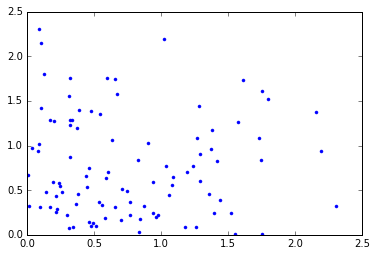

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# a sample array containing the timings of events in order: [1, 2.1, 2.9, 3.1...]
times = np.cumsum(np.abs(np.random.normal(size=100)))

# calculate time differences:
diffs = np.array([times[i]-times[i-1] for i in range(1,len(times))])

xcoords = diffs[:-1] # all differences except the last
ycoords = diffs[1:] # all differences except the first

plt.plot(xcoords, ycoords, 'b.') # make scatter plot with blue dots
plt.show()

In [4]:
for l in 

array([  0.81146892,   1.19164645,   1.65221569,   1.79238796,
         2.26905304,   2.37312241,   4.52620557,   5.89643686,
         6.85637856,   7.05534802,   8.32597434,   9.40563535,
         9.96665418,  10.2976676 ,  11.58563161,  12.19216082,
        12.89123778,  13.05991116,  13.37054166,  13.4506398 ,
        14.38905456,  14.97604178,  15.60730716,  16.66595662,
        17.1137963 ,  17.64893739,  18.01798562,  19.21087726,
        19.91743147,  20.42945945,  20.53168819,  21.95139129,
        22.78006841,  23.62017915,  23.79391249,  25.07972298,
        26.51854587,  26.90636944,  28.30253455,  28.5426001 ,
        29.12589107,  29.31678606,  29.91162339,  31.6659764 ,
        31.67843018,  32.00161725,  33.75693171,  35.36762732,
        37.1004632 ,  38.18700461,  38.83989498,  40.58638879,
        41.42358539,  41.45882639,  42.43383354,  42.65343039,
        42.9477102 ,  43.16427078,  43.42306279,  43.89984952,
        45.28243087,  46.46162248,  46.55396298,  46.87

/Users/linwood/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


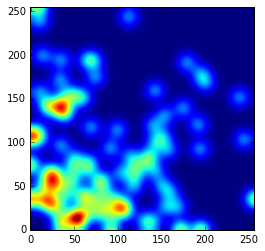

In [2]:
import scipy.ndimage as ndi

Nside=256 # this is the number of bins along x and y for the histogram
width=8 # the width of the Gaussian function along x and y when applying the blur operation

H = np.zeros((Nside,Nside)) # a 'histogram' matrix that counts the number of points in each grid-square

max_diff = np.max(diffs) # maximum time difference

x_heat = (Nside-1)*xcoords/max_diff # the xy coordinates scaled to the size of the matrix
y_heat = (Nside-1)*ycoords/max_diff # subtract 1 since Python starts counting at 0, unlike Fortran and R

for i in range(len(xcoords)): # loop over all points to calculate the population of each bin
    H[x_heat[i], y_heat[i]] += 1 # Increase count by 1
    #here, the integer part of x/y_heat[i] is automatically taken

H = ndi.gaussian_filter(H,width) # apply Gaussian blur
H = np.transpose(H) # so that the orientation is the same as the scatter plot

plt.imshow(H, origin='lower') # display H as an image
plt.show()

In [3]:
from nltk.twitter import Twitter

In [68]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
import unicodedata
stemmer = SnowballStemmer("english")
lemmer = WordNetLemmatizer()
wordnet_tags = ['n', 'v', 'a', 's', 'r']
from sklearn.feature_extraction import stop_words
tknzr = TweetTokenizer()
stopwords = stop_words.ENGLISH_STOP_WORDS

In [137]:
tweets = [unicodedata.normalize('NFKD', i['text']).encode('ascii','ignore') for i in nflgame3]
users = [unicodedata.normalize('NFKD', i['user']['screen_name']).encode('ascii','ignore') for i in nflgame3]

In [134]:
def custom_tok(text):
    text = text
    tokens = list((set(tknzr.tokenize(text)) - set(stopwords)-set(string.punctuation)))
    return tokens

In [153]:
totalvocab_tokenized = []
for l in nflgame2[1:20]:
    totalvocab_tokenized.append((custom_tok(l['text'])))
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized})

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
counvec = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(max_df=0.6, max_features=1000000,
                                 min_df=0.00, stop_words='english',
                                 use_idf=True, tokenizer = custom_tok)

tfidf_matrix = tfidf_vectorizer.fit_transform(tweets) #fit the vectorizer to synopses

print(tfidf_matrix.shape)
print()
print()
terms = tfidf_vectorizer.get_feature_names()
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print (dist)
print()
print()

(8452, 12324)


[[ -2.22044605e-16   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   0.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 ..., 
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00  -2.22044605e-16]]




In [160]:
vocab_frame.head()

,words
0,"[…, It's, LETS, Troyse, Boys, game, ARE, time,..."
1,"[A, confidence, :/, EASY, Editors, choice.http..."
2,"[gooooooooo, Let's, https://t.co/CibJdkIFIZ, S..."
3,"[#Nantucket, https://t.co/2jnWviMZBD, Gillette..."
4,"[’, Great, Smokin, @senatorjohn]"


In [139]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print (len(km.labels_.tolist()))
playoffgame = { 'username': users, 'tweet': tweets}
frame = pd.DataFrame(playoffgame, columns = ['username', 'tweet'])
frame['cluster'] = np.asarray(km.labels_.tolist())
frame.head()

CPU times: user 5.72 s, sys: 21.7 ms, total: 5.74 s
Wall time: 5.77 s
8452


,username,tweet,cluster
0,GooseBravo25,#YouLikeThat #HTTR @dallascowboys @stayhungary...,3
1,msquared980,"Why didn't we come up with ""Massketeers"" while...",0
2,ricardocarreon,Give Cheese a chance! #GoPackers #NFLPlayoffs ...,0
3,Littt_Lis,"""Sometimes he calls me boo, but sometimes he c...",0
4,ImRoonster,@MotterDavid when you replied I was like who t...,0


In [150]:
frame.groupby('cluster').tweet.count()

cluster
0    7561
1      64
2     121
3     547
4     159
Name: tweet, dtype: int64

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [165]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

import mpld3
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [166]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=tweets)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,13)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

NameError: name 'xs' is not defined